###__Project on Restaurant Data Analysis__

This project highlights key findings from an in-depth restaurant data analysis aimed at helping businesses make well-informed decisions to improve their operations and enhance customer satisfaction. The dataset includes 9,542 records across 18 attributes, ranging from restaurant names and locations to average costs and customer ratings. This report evaluates key metrics such as customer ratings, pricing strategies, and service availability to identify actionable insights and growth opportunities.

###__Importing libraries__

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Level 1**
### **Task 1: Data Exploration and Preprocessing**

In [33]:
data_path = '/content/Dataset .csv'

In [34]:
data = pd.read_csv(data_path, encoding='utf-8')

In [35]:
pd.set_option('display.max_row', None)

data = data.drop(['Locality Verbose', 'Restaurant ID', 'Currency'], axis = 1)
data.tail(5)

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,28.977392,41.022793,Turkish,80,No,No,No,No,3,4.1,Green,Very Good,788
9547,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,No,No,No,No,3,4.2,Green,Very Good,1034
9548,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,29.034640,41.055817,"Italian, World Cuisine",170,No,No,No,No,4,3.7,Yellow,Good,661
9549,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,29.036019,41.057979,Restaurant Cafe,120,No,No,No,No,4,4.0,Green,Very Good,901
9550,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,29.026016,40.984776,Cafe,55,No,No,No,No,2,4.0,Green,Very Good,591


#### __Replace unknown characters__

In [36]:
corrected_columns = ['City', 'Address', 'Restaurant Name', 'Locality', 'Cuisines']

data[corrected_columns] = data[corrected_columns].replace({
    'Bras�_lia': 'Brasília','S��o Paulo': 'São Paulo','Pont��o': 'Pontão','��stanbul': 'Istanbul',
    'Apraz�': 'Aprazível','Ant��nio': 'Antônio','Jesu�_no': 'Jesuíno','Bar��o': 'Barão','Jo��o': 'João',
    'Consola�_��o': 'Consolação','Tabapu��': 'Tabapuã','Gon�_alves': 'Gonçalves','G��vea': 'Gávea',
    'An�_bal': 'Aníbal', 'Mendon�_a': 'Mendonça', 'Ang��lica': 'Angélica', 'Bot��nico': 'Botânico',
    'Metr��': 'Metrô', 'S��nia': 'Vila Sônia', '��Garden��Galleria': 'Garden Galleria Mall',
    'C��sar': 'César', 'F��lix': 'Félix', 'Concei�_��o': 'Conceição', '�guas': 'Águas', 'L�_cio': 'Lúcio',
    'Rep�_blica': 'República', 'Pra�_a': 'Praça', 'Jos��': 'José', 'Arauc��rias': 'Araucárias', 'Edif�_cio': 'Edifício',
    'It��lia': 'Itália', '41��': '41st', '�rea': 'Area', 'Caf��': 'Café',
    'Armada AVM, S�_���_t�_z�_, Yenimahalle': 'Armada AVM, Söğütözü, Yenimahalle',
    'Chawla\'s�_': 'Chawla\'s', 'Eden Noodles Cafe �__·�_��_��_��' : 'Eden Noodles Cafe',
    '�ayyolu': 'Çayyolu', '�ukurambar': 'Çukuramba', 'Gazi Osman Pa��a': 'Gazi Osman Paşa',
    'Gazi Osman Pa��a': 'Gazi Osman Paşa', 'Kavakl۱dere': 'Kavaklıdere', '��niversiteler': 'Üniversiteler',
    '�ankaya': 'Çankaya', 'K�_�_�_k Esat': 'Küçükesat', 'Macunk�_y': 'Macunköy',
    '��mitk�_y': 'Ümitköy', 'Y۱ld۱zevler': 'Yıldızevler', 'Asmal۱mescit': 'Asmalımescit',
    'Be��ikta�� Merkez': 'Beşiktaş Merkez', 'Emirg��n': 'Emirgan', 'Kad۱k�_y Merkez': 'Kadıköy Merkez',
    'Karak�_y': 'Karaköy', 'Ko��uyolu': 'Koşuyolu', 'Kuru�_e��me': 'Kuruçeşme',
    'Kentpark AVM, ��niversiteler, �ankaya': 'Kentpark AVM, Üniversiteler, Çankaya',
    'Armada AVM, Kat -1, Eski��ehir Yolu, No 6, Yenimahalle, Ankara': 'Armada AVM, Kat -1, Eskişehir Yolu, No 6, Yenimahalle, Ankara',
    'Cafea��' : 'Caferağa', 'Bademalt۱' : 'Bademaltı', 'Kad۱k�_y' : 'Kadıköy',
    '��st�_nda��' : 'Üstündağ', 'Kemanke��': 'Kemankeş', 'Pa��a': 'Paşa', 'K۱l۱�_ ': 'Kılıç Ali Paşa',
    'R۱ht۱m': 'Rıhtım', 'Beyo��lu': 'Beyoğlu', '��stiklal': 'İstiklal', 'Cevdetpa��a': 'Cevdetpaşa',
    'T�_rkali': 'Türkali', 'Ba��dat': 'Bağdat', 'Sak۱p Sabanc۱': 'Sakıp Sabancı', 'Cafera��a': 'Caferağa',
    'Ne��et �_mer': 'Neşet Ömer', 'Kemanke��': 'Kemankeş', 'Gaziosmanpa��a': 'Gaziosmanpaşa',
    '�_ehit �_mer': 'Şehit Ömer', 'Yaz۱c۱o��lu': 'Yazıcıoğlu', 'G�_zeltepe': 'Güzeltepe', 'Ho��dere': 'Hoşdere',
    'Karaköy G�_ll�_o��lu': 'Karaköy Güllüoğlu', 'B�_rek': 'Börek', 'Mithatpa��a': 'Mithatpaşa',
    'Gen�_lik': 'Gençlik', '����yerleri': 'Yazıyerleri',
    'K۱z۱lay': 'Kızılay', 'D�_ner': 'Döner', 'O��uz Ar۱k' : 'Oğuz Arık', 'Tunal۱': 'Tunalı',
    'Naml۱': 'Namlı', "Pizza �� Bessa": "Pizza e Bessa", "Tayp��": "Taypé",
    "Manzu��": "Manzuço", "Zaz�� Bistr�� Tropical": "Zazú Bistrô Tropical",
    "Fil�� de Ouro": "Filé de Ouro", "Terra�_o Itália": "Terraço Itália",
    "Divino Fog��o": "Divino Fogão", "Esquina Mocot�_": "Esquina Mocotó", 'Karaköy G�_ll�_o��lu' : 'Karaköy Güllüoğlu',
    "Cev�_che ": "Ceviche", '#45' : '45', '#Dilliwaale' : 'Dillwaale', '#InstaFreeze' : 'InstaFreeze'
}, regex=True)

#  data['Currency'] = data['Currency'].replace({'Pounds(��)' : 'Pounds(£)'})

data = data.replace({'Leman K�_lt�_r': 'Leman Kultur', 'Dem Karak�_y': 'Dem Karakoy',
                     'Masabası Kebapcısı': 'Masaba��۱ Kebap�_۱s۱', 'Masaba��۱ Kebap�_۱s۱': 'Masabası Kebapcısı',
                      'Hattena Hatay Sofras۱': 'Hattena Hatay Sofrası','Ceviz A��ac۱': 'Ceviz Agacı',
                      'A���k Kahve': 'Acık Kahve', 'Karak�_y G�_ll�_o��lu': 'Karakoy Gulluoglu',
                      'Me��hur Tavac۱ Recep Usta':'Meshur Tavacı Recep Usta',
                      'Gazi Osman Pa��a': 'Gazi Osman Paşa', '�ukura��a Sofras۱' : 'Çukuraga Sofrası',
                      'Masaba��۱' : 'Masabası', 'Me��hur �_z�_elik Aspava': 'Meşhur Özçelik Aspava',
                     'Y۱ld۱z Aspava': 'Yıldız Aspava', 'D�_vero��lu': 'Deveroğlu', '�ukura��a Sofras۱': 'Çukurağa Sofrası',
                     'Emirgan S�_ti��': 'Emirgan Sütiş', 'Hattena Hatay Sofras۱': 'Hattena Hatay Sofrası',
                      'Masaba��۱ Kebap�_۱s۱': 'Masabaşı Kebapçısı','Pizza ��l Forno': 'Pizza Al Forno'})


In [37]:
data.tail(2)

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9549,Acık Kahve,208,Istanbul,"Kuruçeşme Mahallesi, Muallim Naci Caddesi, No ...",Kuruçeşme,29.036019,41.057979,Restaurant Cafe,120,No,No,No,No,4,4.0,Green,Very Good,901
9550,Walter's Coffee Roastery,208,Istanbul,"Caferağaa Mahallesi, Bademaltı Sokak, No 21/B,...",Moda,29.026016,40.984776,Cafe,55,No,No,No,No,2,4.0,Green,Very Good,591


In [7]:
data.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

#### __Shape of the data__

In [38]:
print(data.shape)
print('Number of row:', data.shape[0])
print('Number of columns:', data.shape[1])

(9551, 18)
Number of row: 9551
Number of columns: 18


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   object 
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Longitude             9551 non-null   float64
 6   Latitude              9551 non-null   float64
 7   Cuisines              9542 non-null   object 
 8   Average Cost for two  9551 non-null   int64  
 9   Has Table booking     9551 non-null   object 
 10  Has Online delivery   9551 non-null   object 
 11  Is delivering now     9551 non-null   object 
 12  Switch to order menu  9551 non-null   object 
 13  Price range           9551 non-null   int64  
 14  Aggregate rating      9551 non-null   float64
 15  Rating color         

#### __Missing values__

In [40]:
data['Cuisines'].isnull().sum()

9

In [41]:
miss_values_percent = (data['Cuisines'].isnull().sum()/len(data))*100
print(miss_values_percent)

0.09423097057899697


In [42]:
data = data.dropna(how = 'any')

In [43]:
data.duplicated().sum()

0

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9542 non-null   object 
 1   Country Code          9542 non-null   int64  
 2   City                  9542 non-null   object 
 3   Address               9542 non-null   object 
 4   Locality              9542 non-null   object 
 5   Longitude             9542 non-null   float64
 6   Latitude              9542 non-null   float64
 7   Cuisines              9542 non-null   object 
 8   Average Cost for two  9542 non-null   int64  
 9   Has Table booking     9542 non-null   object 
 10  Has Online delivery   9542 non-null   object 
 11  Is delivering now     9542 non-null   object 
 12  Switch to order menu  9542 non-null   object 
 13  Price range           9542 non-null   int64  
 14  Aggregate rating      9542 non-null   float64
 15  Rating color          9542

In [ ]:
data.isnull().sum().sum()

0

#### __Analyze the distribution of the target variable (Aggregate rating)__

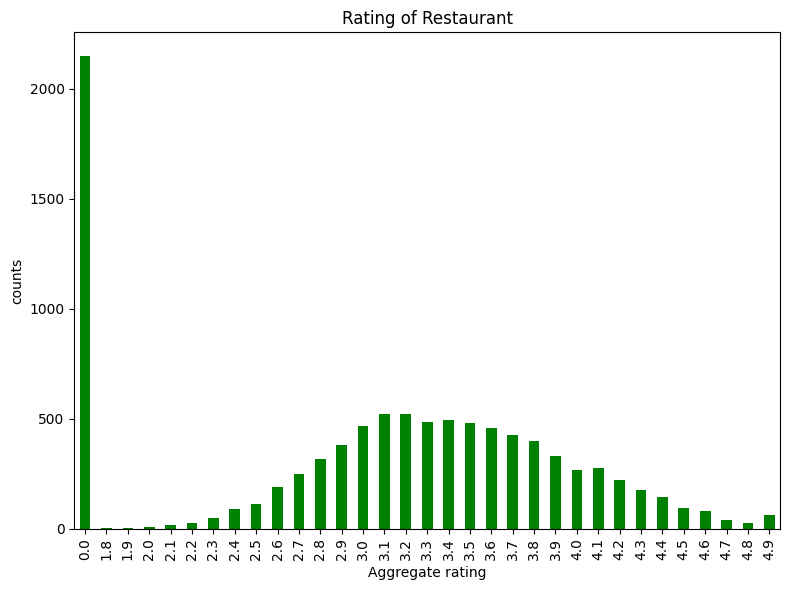

In [45]:
ax = data['Aggregate rating'].value_counts().sort_index().plot(
    kind = 'bar', title = 'Rating of Restaurant',
    figsize = (8,6), color = 'g')
ax.set_ylabel('counts')

plt.tight_layout()
plt.show()

#### __Identify any class imbalance__

In [17]:
agg_count = data['Aggregate rating'].value_counts()
data_sum = data['Aggregate rating'].sum()
agg_proportion = agg_count/data_sum

print((agg_proportion)*100)

Aggregate rating
0.0    8.446152
3.2    2.052556
3.1    2.040760
3.4    1.946390
3.3    1.899205
3.5    1.887408
3.0    1.840223
3.6    1.800902
3.7    1.679007
3.8    1.568908
2.9    1.498130
3.9    1.305457
2.8    1.238612
4.1    1.077396
4.0    1.045939
2.7    0.983025
4.2    0.868994
2.6    0.751031
4.3    0.684185
4.4    0.562290
2.5    0.432531
4.5    0.373550
2.4    0.342093
4.6    0.306704
4.9    0.239858
2.3    0.184809
4.7    0.161216
2.2    0.106167
4.8    0.098303
2.1    0.058982
2.0    0.027525
1.9    0.007864
1.8    0.003932
Name: count, dtype: float64


### **Task 2**
#### __Descriptive Analysis__

In [32]:
data.describe().round(3)

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9542.000,9542.000,9542.000,9542.000,9542.000,9542.000,9542.000
mean,18.179,64.275,25.849,1200.326,1.805,2.665,156.772
std,56.452,41.198,11.010,16128.744,0.906,1.517,430.203
min,1.000,-157.948,-41.330,0.000,1.000,0.000,0.000
25%,1.000,77.082,28.479,250.000,1.000,2.500,5.000
50%,1.000,77.192,28.570,400.000,2.000,3.200,31.000
75%,1.000,77.282,28.643,700.000,2.000,3.700,130.000
max,216.000,174.832,55.977,800000.000,4.000,4.900,10934.000


#### __Averaging rating of Restaurant and City__

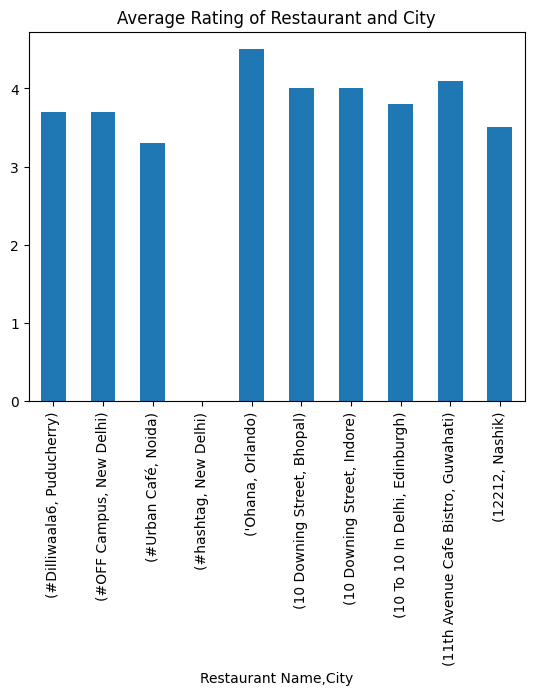

In [46]:
data.groupby(['Restaurant Name', 'City'])['Aggregate rating'].mean().head(10).plot(
        kind='bar', title='Average Rating of Restaurant and City')

plt.show()

#### __Distribution of Cuisines__

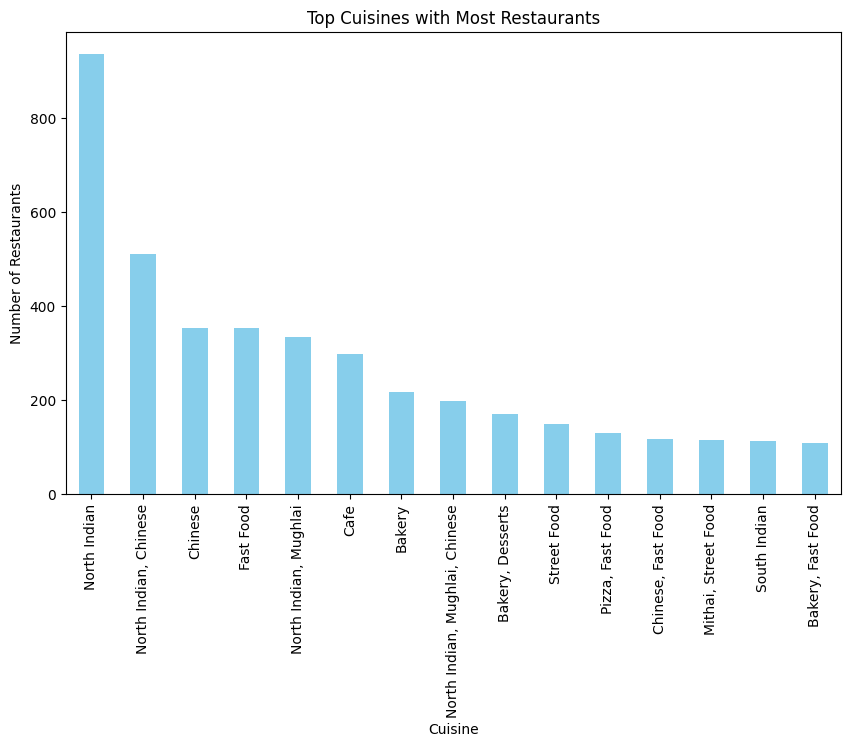

In [47]:
data['Cuisines'].value_counts().head(15).plot(kind='bar', color='skyblue', figsize=(10, 6),
                                            title = 'Top Cuisines with Most Restaurants')
plt.ylabel("Number of Restaurants")
plt.xlabel("Cuisine")
plt.xticks(rotation=90)
plt.show()

#### __Distribution of Cities with Most Restaurant__

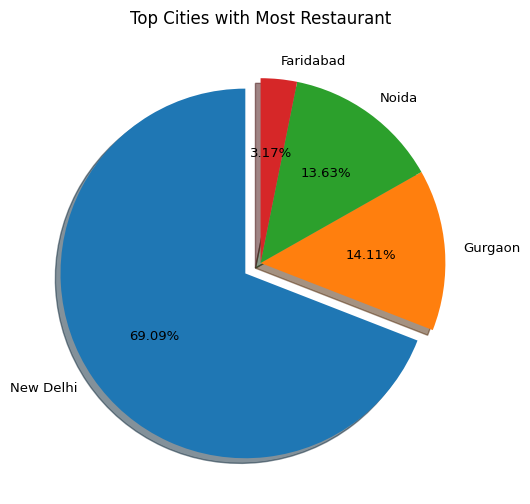

In [48]:
data['City'].value_counts().head(4).plot(kind = 'pie',
                                        autopct = '%.2f%%', startangle = 90, shadow = True,
                                        explode = [0.1] + [0] * (len(data.City.head(4)) - 1), figsize = (7, 6),
                                        fontsize = 9.5, title = 'Top Cities with Most Restaurant')
plt.ylabel('')
plt.show()

### __Task 3:  Geospatial Analysis__
#### __Visualize of locations of restaurants on a map__

In [ ]:
import geopandas as gpd
data1 = data[['Restaurant Name', 'Latitude', 'Longitude']]

gdf = gpd.GeoDataFrame(data1,
                       geometry = gpd.points_from_xy(data1['Longitude'], data1['Latitude']))

gdf.head()

,Restaurant Name,Latitude,Longitude,geometry
0,Le Petit Souffle,14.565443,121.027535,POINT (121.02754 14.56544)
1,Izakaya Kikufuji,14.553708,121.014101,POINT (121.0141 14.55371)
2,Heat - Edsa Shangri-La,14.581404,121.056831,POINT (121.05683 14.5814)
3,Ooma,14.585318,121.056475,POINT (121.05648 14.58532)
4,Sambo Kojin,14.584450,121.057508,POINT (121.05751 14.58445)


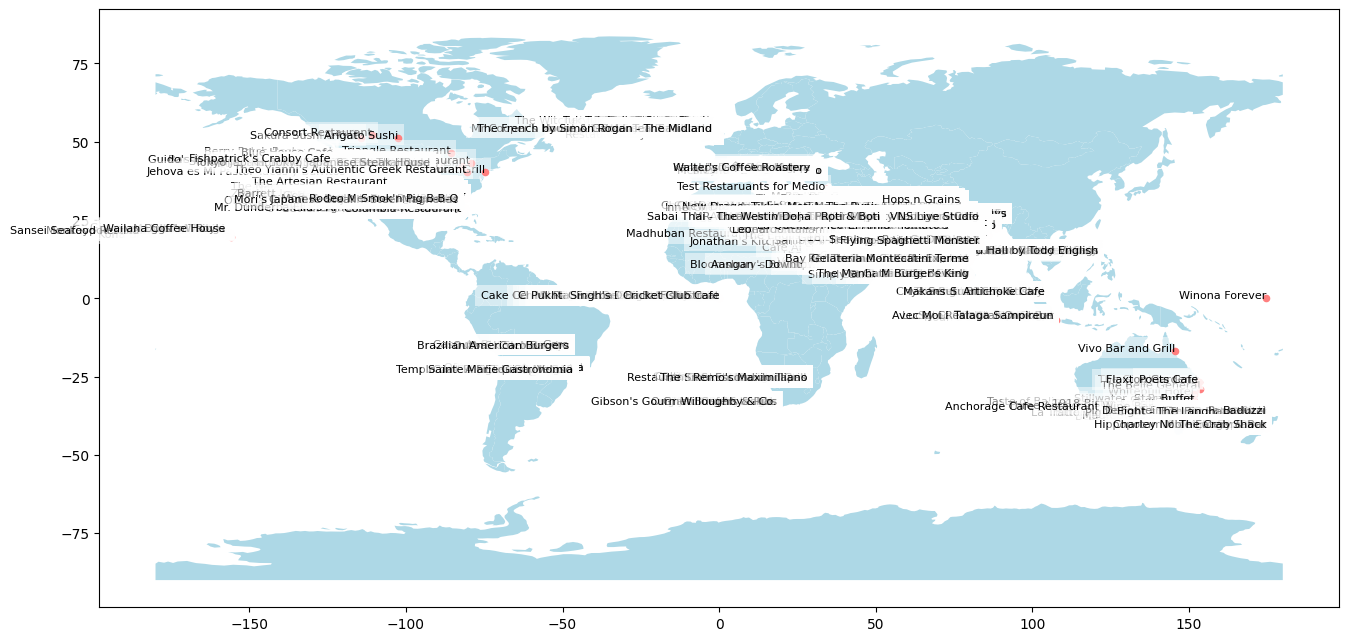

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px

gdf = gpd.GeoDataFrame(data1,
                           geometry=gpd.points_from_xy(data1['Longitude'], data1['Latitude']))

file_path = '/content/world_country/ne_110m_admin_0_countries.shp'

world_data = gpd.read_file(file_path)

ax = world_data.plot(figsize=(16, 20), color='lightblue')

gdf.plot(ax=ax, color='red', marker='o', markersize=20)

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Restaurant Name']):
    ax.text(x, y, label, fontsize=8, ha='right', color='black',
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.show()

In [ ]:
data.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [50]:
data2 = data.iloc[:,[0, 2, 4, 14]]
data2.head()

,Restaurant Name,City,Locality,Aggregate rating
0,Le Petit Souffle,Makati City,"Century City Mall, Poblacion, Makati City",4.8
1,Izakaya Kikufuji,Makati City,"Little Tokyo, Legaspi Village, Makati City",4.5
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",4.4
3,Ooma,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",4.9
4,Sambo Kojin,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",4.8


#### __Distribution of restaurants across different cities.__

<ipython-input-63-b1b18235fcd6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = city_avg_rating.values, y = city_avg_rating.index, palette = 'plasma')


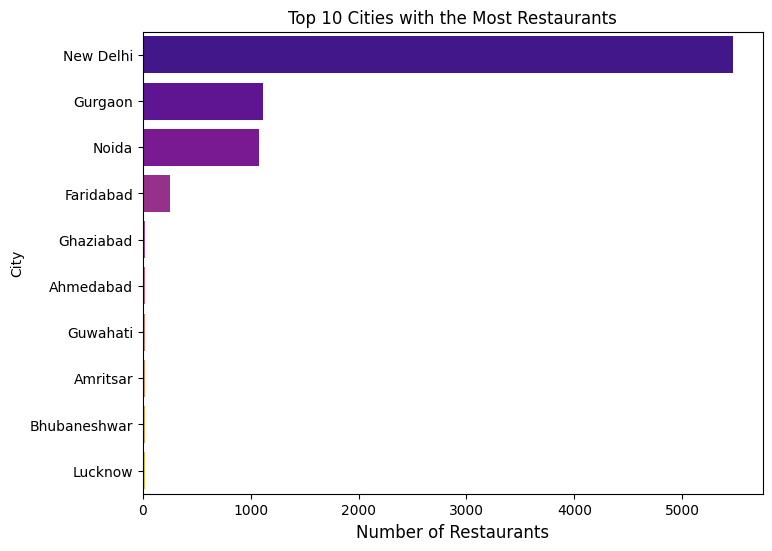

In [ ]:
city_avg_rating = data2.City.value_counts().head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x = city_avg_rating.values, y = city_avg_rating.index, palette = 'plasma')
plt.title('Top 10 Cities with the Most Restaurants', fontsize=12)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('City', fontsize=10)

plt.show()

#### __Correlation between the restaurant's location and its rating.__

In [51]:
from scipy.stats import f_oneway

groups = [data2[data2['City'] == city]['Aggregate rating'].values for city in data2['City'].unique()]

# Perform ANOVA test
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA f-statistic: {f_stat}, p-value: {p_value}")
print('\n')

if p_value < 0.05:
    print("There is a significant correlation between restaurant's location (city) and its rating.")
else:
    print("There is no significant correlation between restaurant's location (city) and its rating.")

ANOVA f-statistic: 14.477968174080516, p-value: 7.334998383401416e-294


There is a significant correlation between restaurant's location (city) and its rating.


### __Level 2__

#### __Task 1:  Table Booking vs Online Delivery__

In [52]:
booking_yes_count = (data['Has Table booking'] == 'Yes').sum()

percent_of_yes = (booking_yes_count / len(data)) * 100

print(f"Percentage of restaurants offering table booking: {percent_of_yes:.2f}%")

Percentage of restaurants offering table booking: 12.14%


In [53]:
data['Has Online delivery'].value_counts(normalize=True)

,proportion
Has Online delivery,
No,0.743136
Yes,0.256864


#### __Proportion of online delivery__

In [54]:
online_yes_count = (data['Has Online delivery'] == 'Yes').sum()

percent_of_yes = (online_yes_count / len(data)) * 100

print(f"Percentage of restaurants offering online delivery: {percent_of_yes:.2f}%")

Percentage of restaurants offering online delivery: 25.69%


In [ ]:
average_ratings = data.groupby('Has Online delivery')['Aggregate rating'].mean()
average_ratings

,Aggregate rating
Has Online delivery,
No,2.463517
Yes,3.248837


In [ ]:
total_counts = data['Has Online delivery'].sum()
print(len(total_counts))

21535


### __Average ratings of restaurants with table booking and those without.__

In [56]:
average_ratings = data.groupby('Has Table booking')['Aggregate rating'].mean()
average_ratings

,Aggregate rating
Has Table booking,
No,2.557956
Yes,3.441969


<ipython-input-57-8a7216b4d768>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings.index, y=average_ratings.values, palette ='coolwarm')


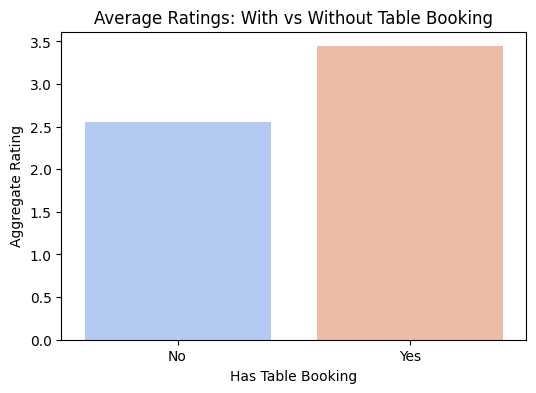

In [57]:
plt.figure(figsize=(6, 4))
sns.barplot(x=average_ratings.index, y=average_ratings.values, palette ='coolwarm')
plt.title('Average Ratings: With vs Without Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Aggregate Rating')

plt.show()

In [ ]:
|data['Address'].iloc[9510:]
pd.set_option('display.max_rows', None)

#### __Availability of online delivery among restaurants with price ranges__

In [58]:
delivery_by_price = data.groupby(['Price range', 'Has Online delivery']).size().unstack(fill_value=0)
delivery_by_price

Has Online delivery,No,Yes
Price range,,
1,3737,701
2,1827,1286
3,994,411
4,533,53


In [59]:
delivery_proportion = (delivery_by_price['Yes']/delivery_by_price.sum(axis = 1))*100
print(delivery_proportion)

Price range
1    15.795403
2    41.310633
3    29.252669
4     9.044369
dtype: float64


<ipython-input-60-ea2ad648ad4f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= delivery_proportion.index, y=delivery_proportion.values, palette ='viridis')


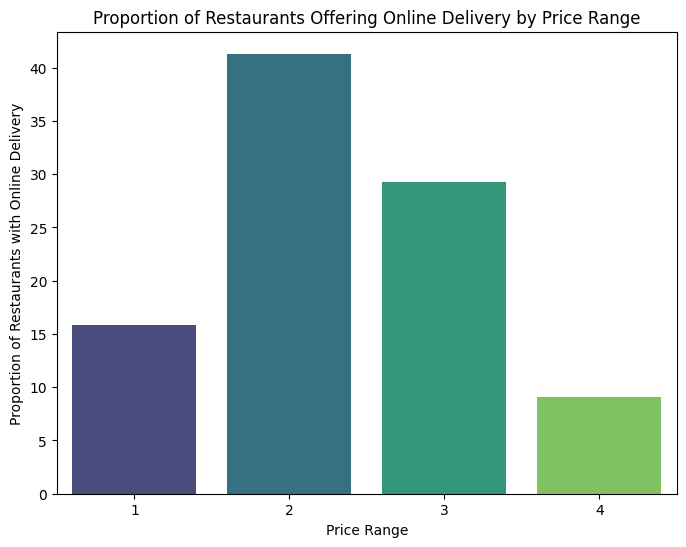

In [60]:
plt.figure(figsize=(8, 6))
sns.barplot(x= delivery_proportion.index, y=delivery_proportion.values, palette ='viridis')
plt.title('Proportion of Restaurants Offering Online Delivery by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Proportion of Restaurants with Online Delivery')

plt.show()

### __Task 2: Price Range Analysis__
#### __Common price range among all the restaurants__

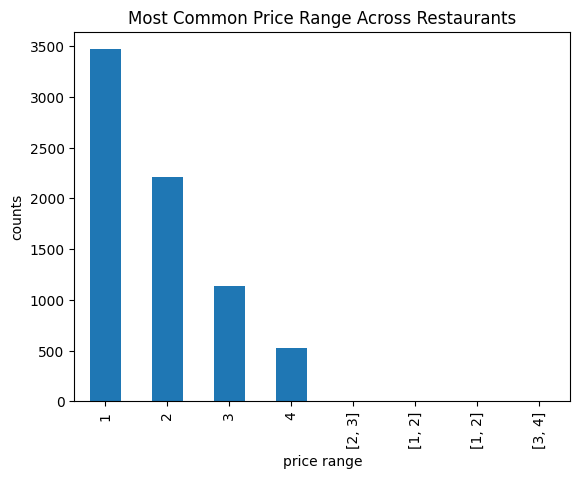

In [61]:
mode_price = data.groupby('Restaurant Name')['Price range'].agg(pd.Series.mode).value_counts()
mode_price.head(8).plot(kind='bar', title ='Most Common Price Range Across Restaurants')
plt.xlabel('price range')
plt.ylabel('counts')

plt.show()

#### __Average rating for each price range__

In [ ]:
price_range_avg_rating = data.groupby('Price range')['Aggregate rating'].mean()
print(price_range_avg_rating*10)

Price range
1    19.974763
2    29.410536
3    36.826335
4    38.179181
Name: Aggregate rating, dtype: float64


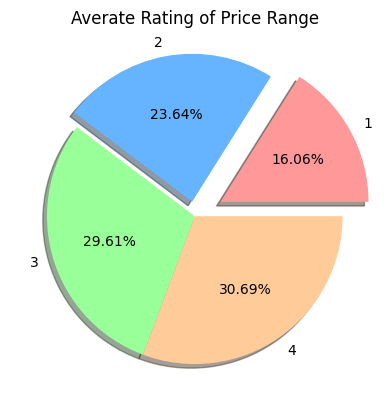

In [ ]:
price_range_avg_rating.plot(kind='pie', autopct='%.2f%%', shadow = True, explode = [0.2, 0.1, 0, 0],
                            colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Averate Rating of Price Range')
plt.ylabel('')

plt.show()

#### __Color representation of highest average rating among different price ranges__


In [ ]:
avg_rating_by_color_and_price_range = data.groupby(['Rating color', 'Price range'])['Aggregate rating'].mean()
print(avg_rating_by_color_and_price_range)
print('\n')
print('Highest Average Color:', avg_rating_by_color_and_price_range.idxmax())

Rating color  Price range
Dark Green    1              4.667742
              2              4.627536
              3              4.646032
              4              4.709459
Green         1              4.157639
              2              4.159385
              3              4.168675
              4              4.188144
Orange        1              3.039894
              2              3.048491
              3              3.097764
              4              3.162376
Red           1              2.293548
              2              2.300000
              3              2.305000
              4              2.283333
White         1              0.000000
              2              0.000000
              3              0.000000
              4              0.000000
Yellow        1              3.661056
              2              3.671159
              3              3.715726
              4              3.716000
Name: Aggregate rating, dtype: float64


Highest Average Color

### __Task 3: Feature Engineering__

In [ ]:
data['Length of Restaurant Name'] = data['Restaurant Name'].apply(len)
data.head(2)

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Length of Restaurant Name
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,16
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,16


<ipython-input-40-c16d6113cb46>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=name_length, y=name_length.values, palette='Blues')


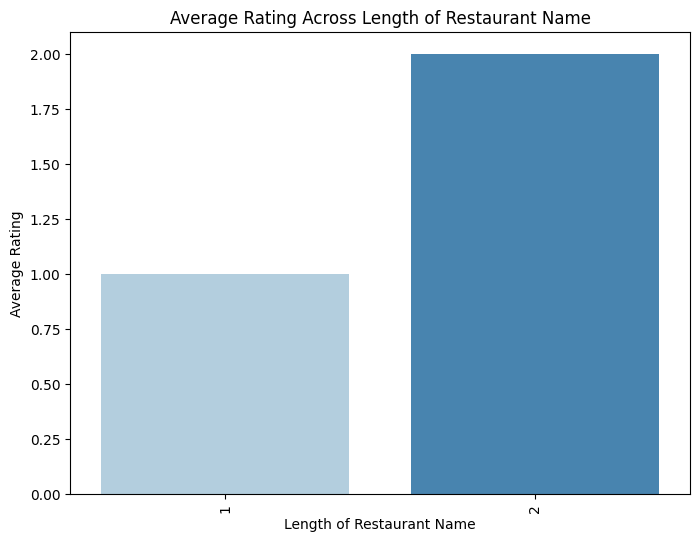

In [ ]:
name_length = data.groupby('Length of Restaurant Name')['Aggregate rating'].mean().value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=name_length, y=name_length.values, palette='Blues')
plt.title('Average Rating Across Length of Restaurant Name')
plt.xlabel('Length of Restaurant Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)

plt.show()

#### __Encoding categorical variables (Table Booking" or "Has Online Delivery)__

In [ ]:
columns_to_encode = ['Has Table booking','Has Online delivery']
data[columns_to_encode] = data[columns_to_encode].replace({'Yes' : 1, 'No' : 0})

<ipython-input-76-f0e72dede218>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columns_to_encode] = data[columns_to_encode].replace({'Yes' : 1, 'No' : 0})


In [ ]:
data = data[['Longitude', 'Latitude', 'Cuisines', 'Average Cost for two',
             'Has Table booking', 'Has Online delivery', 'Price range',
             'Aggregate rating', 'Rating color', 'Rating text', 'Votes']]
data.head(3)

,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,3,4.8,Dark Green,Excellent,314
1,121.014101,14.553708,Japanese,1200,Yes,No,3,4.5,Dark Green,Excellent,591
2,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,4,4.4,Green,Very Good,270


#### __Encoding of Categorical Variable__

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

columns = ['Rating text', 'Rating color']

for column in columns:
  data[column] = label_encoder.fit_transform(data[column])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

encoded_cuisine = ohe.fit_transform(data[['Cuisines']])

encoded_columns = ohe.get_feature_names_out(['Cuisines'])

encoded_data = pd.DataFrame(encoded_cuisine, columns = encoded_columns)

data = pd.concat([data.drop('Cuisines', axis=1), encoded_data], axis=1)

In [ ]:
data.head(3)

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,...,"Cuisines_Turkish, Arabian, Moroccan, Lebanese","Cuisines_Turkish, Mediterranean, Middle Eastern",Cuisines_Vietnamese,"Cuisines_Vietnamese, Fish and Chips","Cuisines_Western, Asian, Cafe","Cuisines_Western, Fusion, Fast Food",Cuisines_World Cuisine,"Cuisines_World Cuisine, Mexican, Italian","Cuisines_World Cuisine, Patisserie, Cafe",Cuisines_nan
0,121.027535,14.565443,1100,1,0,3,4.8,0,1,314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,121.014101,14.553708,1200,1,0,3,4.5,0,1,591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,121.056831,14.581404,4000,1,0,4,4.4,1,5,270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### __Normalization of Dataset__

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_scale = data.drop('Aggregate rating', axis=1)

scaled_data = scaler.fit_transform(columns_to_scale)

scaled_data = pd.DataFrame(scaled_data, columns = columns_to_scale.columns)

#### __Splitting of Dataset__

In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_data
y = data['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, y_train.shape

((7640, 1835), (7640,))

#### __Model Building__

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor(n_estimators= 100,
    max_depth = 10)

rfr_model = rfr.fit(X_train, y_train)
y_pred = rfr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mean squared error:', mse)
print('r2_square:', r2)

mean squared error: 0.02837211833493812
r2_square: 0.9875348155752944


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

dtr = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

dtr_model = dtr.fit(X_train, y_train)

y_pred = dtr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mean squared error:', mse)
print('r2_square:', r2 )

mean squared error: 0.03075206187638908
r2_square: 0.9864891962523255


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model = xgb.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mean squared error:', mse)
print('r2_square:', r2 )

mean squared error: 0.027689965119816452
r2_square: 0.9878345170474233


In [ ]:
import tensorflow as tf
from sklearn.metrics import r2_score, mean_squared_error

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1)  # Output layer for regression;
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics = ['mean_absolute_error'])

# Train the model
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

print('\n')
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared Score on Test Set: {r2}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.2547 - mean_absolute_error: 1.4761 - val_loss: 1.4632 - val_mean_absolute_error: 0.9916
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.8378 - mean_absolute_error: 1.1056 - val_loss: 1.3951 - val_mean_absolute_error: 0.8982
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1725 - mean_absolute_error: 0.8325 - val_loss: 0.9219 - val_mean_absolute_error: 0.7001
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8569 - mean_absolute_error: 0.6818 - val_loss: 0.7617 - val_mean_absolute_error: 0.6198
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8734 - mean_absolute_error: 0.6789 - val_loss: 0.7391 - val_mean_absolute_error: 0.6089
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7472 - mean_absolute_error: 0.6181 - val_loss: 0.8032 - val_mean_absolute_error: 0.6354
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7800 - mean_absolute_error: 0.6379 - v

#### __Feature Importance__

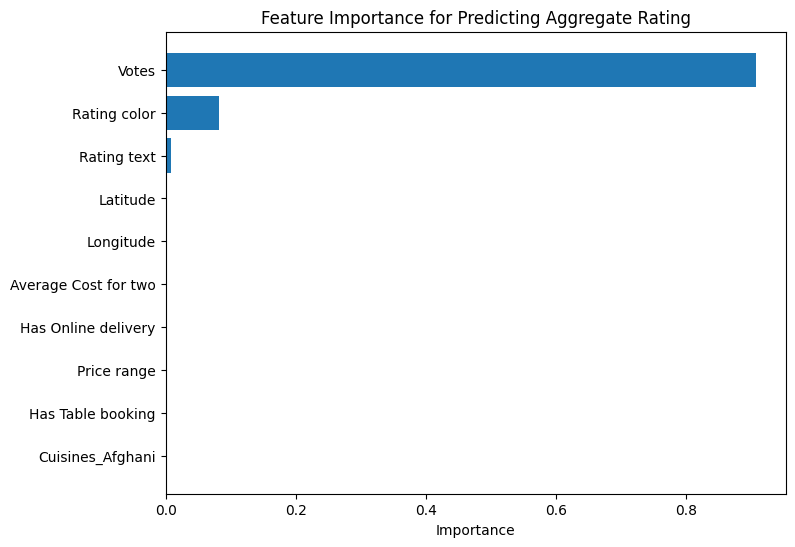

In [ ]:
feature_importance = rfr_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.head(10).sort_values(by='Importance')

plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting Aggregate Rating')
plt.show()


### __Task 3: Task: Data Visualization__
#### __Average rating of Cuisines__

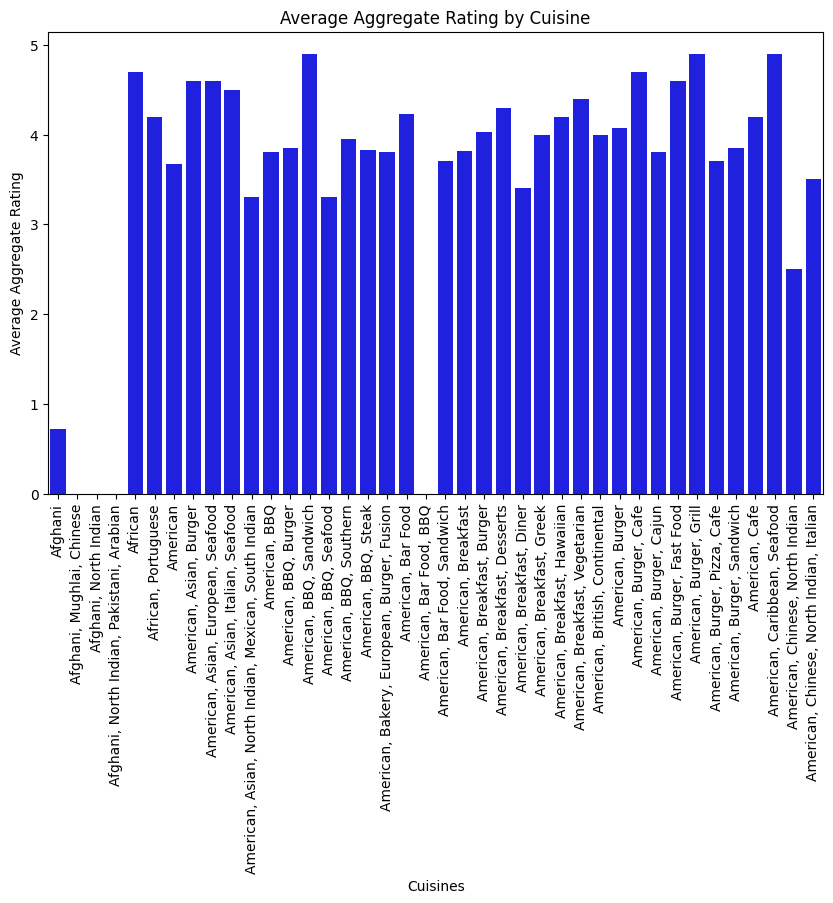

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = data.groupby('Cuisines')['Aggregate rating'].mean().head(40).reset_index()
plt.figure(figsize = (10, 6))
sns.barplot(data = ax, x='Cuisines', y ='Aggregate rating', color='blue')

plt.xticks(rotation = 90)
plt.xlabel('Cuisines')
plt.ylabel('Average Aggregate Rating')
plt.title('Average Aggregate Rating by Cuisine')

plt.show()

In [ ]:
ax.values

array([['Afghani', 0.725],
       ['Afghani, Mughlai, Chinese', 0.0],
       ['Afghani, North Indian', 0.0],
       ['Afghani, North Indian, Pakistani, Arabian', 0.0],
       ['African', 4.7],
       ['African, Portuguese', 4.2],
       ['American', 3.667741935483871],
       ['American, Asian, Burger', 4.6],
       ['American, Asian, European, Seafood', 4.6],
       ['American, Asian, Italian, Seafood', 4.5],
       ['American, Asian, North Indian, Mexican, South Indian', 3.3],
       ['American, BBQ', 3.8],
       ['American, BBQ, Burger', 3.85],
       ['American, BBQ, Sandwich', 4.9],
       ['American, BBQ, Seafood', 3.3],
       ['American, BBQ, Southern', 3.95],
       ['American, BBQ, Steak', 3.825],
       ['American, Bakery, European, Burger, Fusion', 3.8],
       ['American, Bar Food', 4.225],
       ['American, Bar Food, BBQ', 0.0],
       ['American, Bar Food, Sandwich', 3.7],
       ['American, Breakfast', 3.814285714285714],
       ['American, Breakfast, Burger', 4.03333

#### __Popular Cuisines based on Votes__

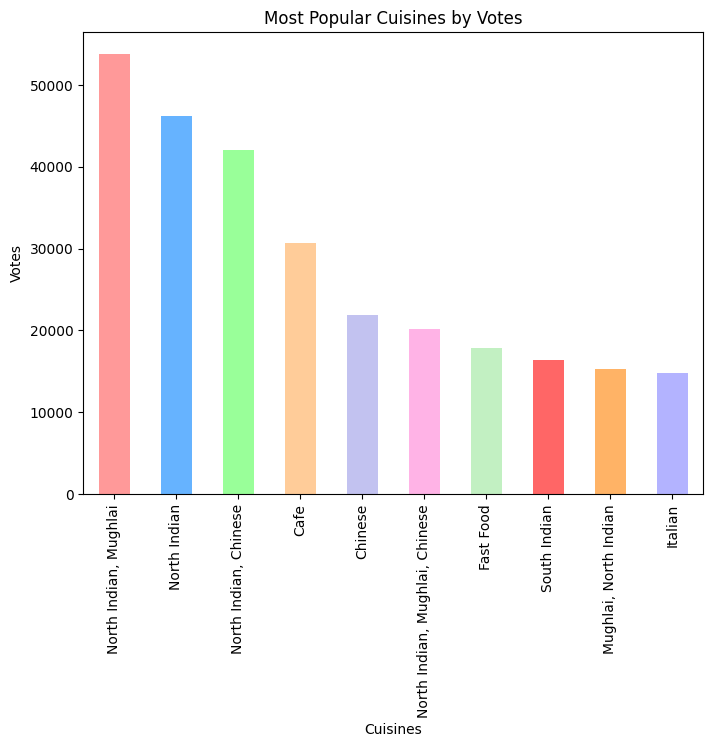

In [ ]:
popular_cuisines = data.groupby('Cuisines')['Votes'].sum().sort_values(
                                  ascending = False)
popular_cuisines.head(10).plot(kind = 'bar', figsize = (8,6), color = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99',
          '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ff6666', '#ffb366', '#b3b3ff'])

plt.xlabel('Cuisines')
plt.ylabel('Votes')
plt.title('Most Popular Cuisines by Votes')

plt.show()

In [ ]:
cuisine_ratings_dist = data.groupby('Cuisines')['Aggregate rating'].agg('mean').reset_index()

print(cuisine_ratings_dist.sort_values(by='Aggregate rating', ascending = False).head(20))


                             Cuisines  Aggregate rating
1062                    Italian, Deli              4.90
949                 Hawaiian, Seafood              4.90
93            American, Sandwich, Tea              4.90
683               Continental, Indian              4.90
796           European, Asian, Indian              4.90
803            European, Contemporary              4.90
808                  European, German              4.90
169          BBQ, Breakfast, Southern              4.90
41           American, Coffee and Tea              4.90
1779                Sunda, Indonesian              4.90
33            American, Burger, Grill              4.90
1286                Mughlai, Lucknowi              4.90
1214  Mexican, American, Healthy Food              4.90
37       American, Caribbean, Seafood              4.90
302           Burger, Bar Food, Steak              4.90
1034     Italian, Bakery, Continental              4.90
1822                    World Cuisine           

In [ ]:
result = data[data['Votes'] == data['Votes'].max()]

print(result[['Cuisines', 'Votes']])


                     Cuisines  Votes
728  Italian, American, Pizza  10934


In [ ]:
data['Votes'].max()

10934

In [ ]:
data['Aggregate rating'].value_counts()

33

In [ ]:
data['Rating text'].value_counts()

,count
Rating text,
Average,3734
Not rated,2148
Good,2096
Very Good,1078
Excellent,300
Poor,186


### __Visual of Relationship Between Aggregate Rating(target variable) and Various Features(Votes, Rating Colors, Price Range, Rating Text)__

<ipython-input-72-f424126084a8>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = ax, x='Rating text', y ='Aggregate rating', palette=


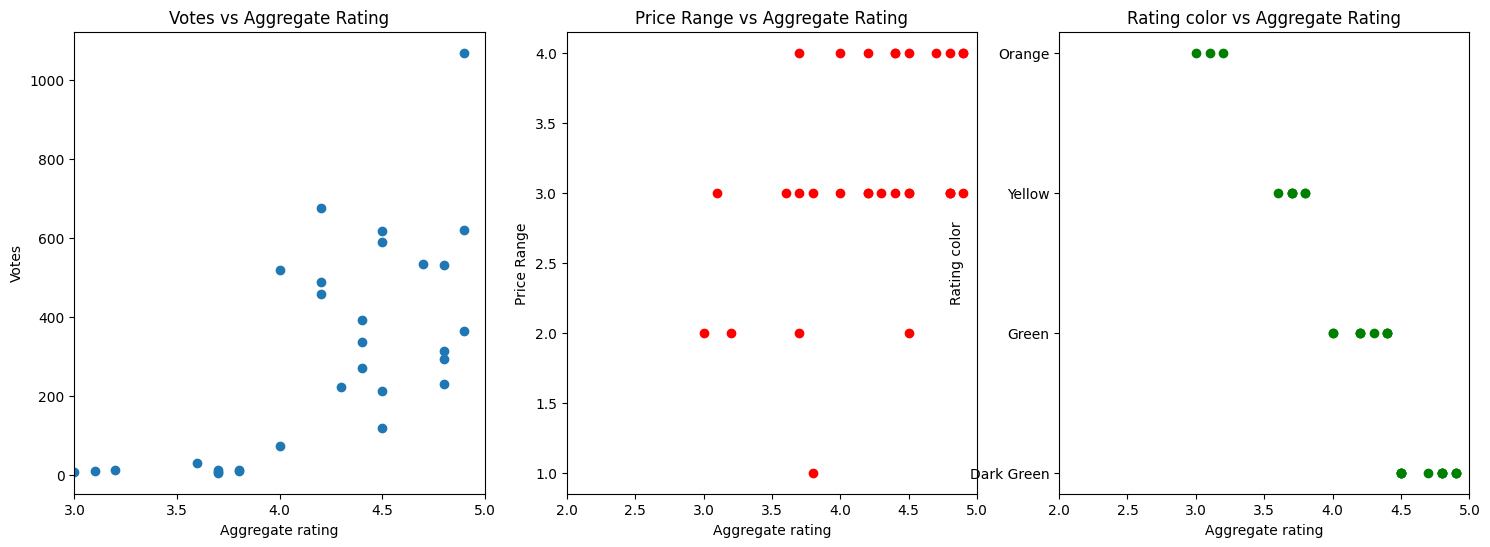

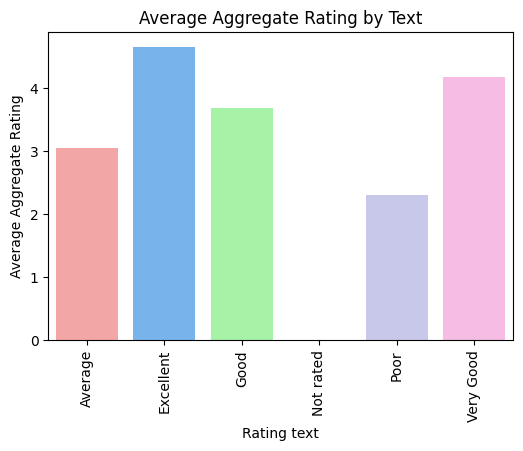

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 6))
plt.subplot(1,3,1)
plt.scatter(data['Aggregate rating'].head(30), data['Votes'].head(30))

plt.xlabel('Aggregate rating')
plt.xlim(3,5)
ticks = np.arange(3, 5.5, 0.5)
plt.xticks(ticks)
plt.ylabel('Votes')
plt.title('Votes vs Aggregate Rating')

plt.subplot(1,3,2)
plt.scatter(data['Aggregate rating'].head(30), data['Price range'].head(30),
            color = 'red')

plt.xlabel('Aggregate rating')
plt.xlim(2,5)
ticks = np.arange(2, 5.5, 0.5)
plt.xticks(ticks)
plt.ylabel('Price Range')
plt.title('Price Range vs Aggregate Rating')

plt.subplot(1,3,3)
plt.scatter(data['Aggregate rating'].head(30), data['Rating color'].head(30),
            color = 'g')

plt.xlabel('Aggregate rating')
plt.xlim(2,5)
ticks = np.arange(2, 5.5, 0.5)
plt.xticks(ticks)
plt.ylabel('Rating color')
plt.title('Rating color vs Aggregate Rating')

# plt.subplot(1,3,4)
ax = data.groupby('Rating text')['Aggregate rating'].mean().head(40).reset_index()
plt.figure(figsize = (6, 4))
sns.barplot(data = ax, x='Rating text', y ='Aggregate rating', palette=
            ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'])

plt.xticks(rotation = 90)
plt.xlabel('Rating text')
plt.ylabel('Average Aggregate Rating')
plt.title('Average Aggregate Rating by Text')

plt.show()
